# **1. Data Exploration**

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dataset Overview:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOpt

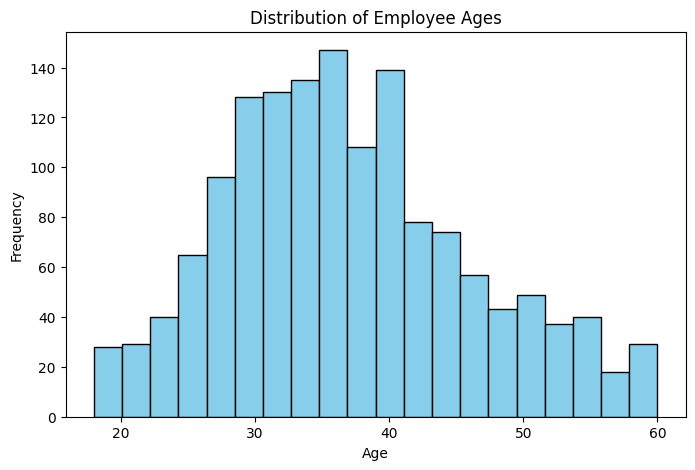

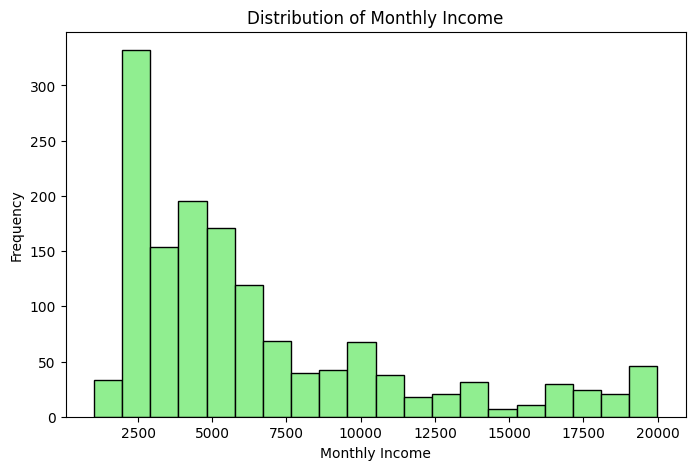

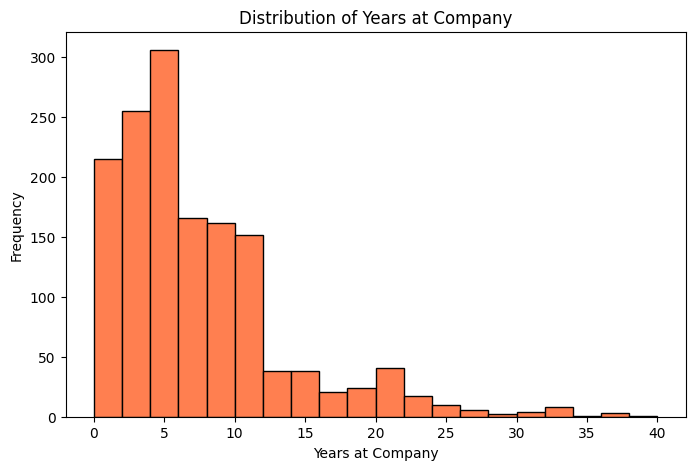

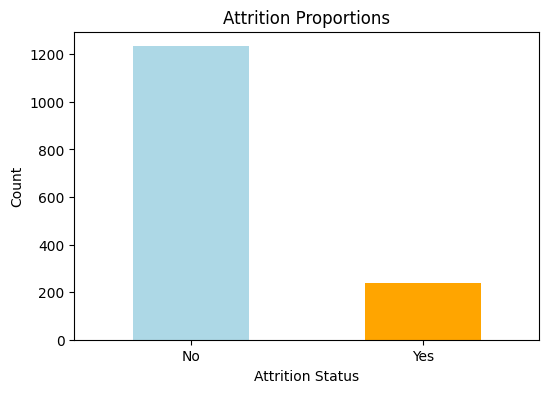

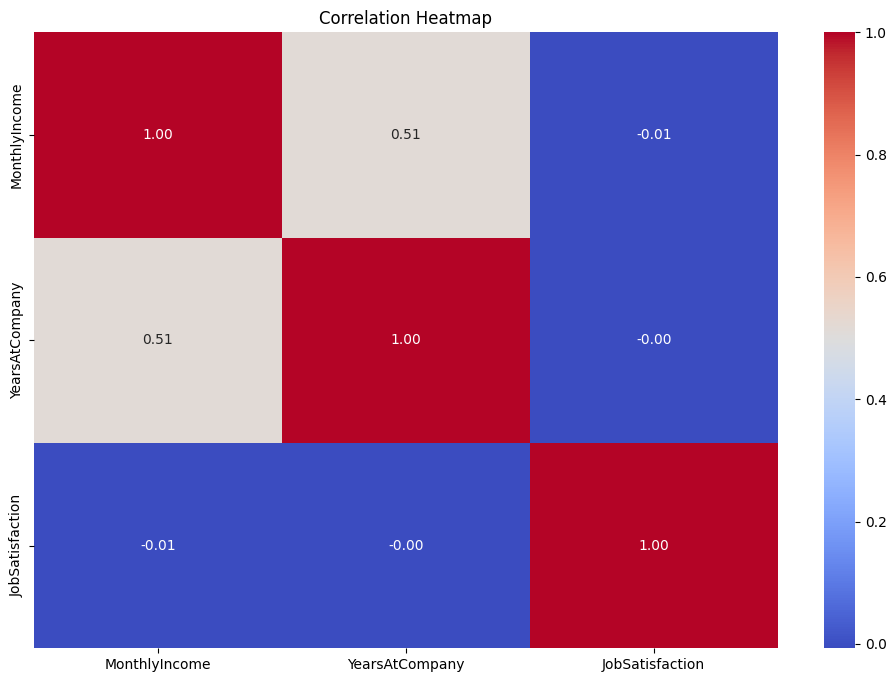

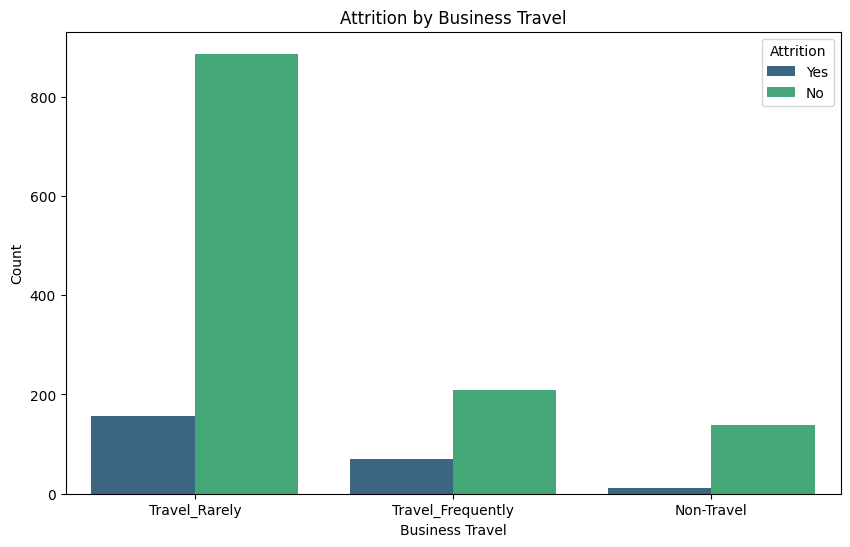

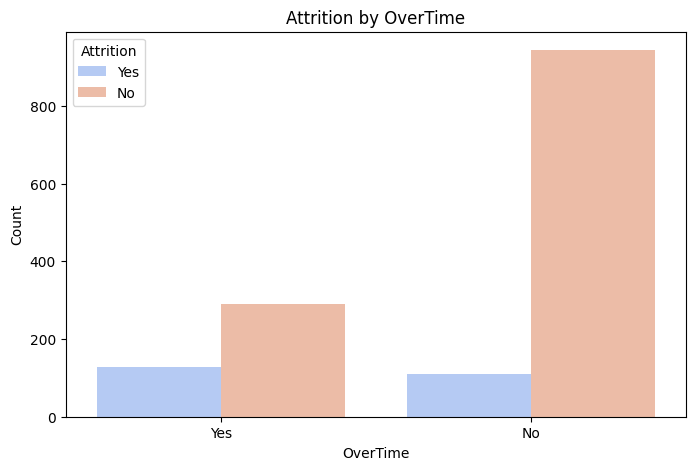


Attrition Rate by OverTime:
          Attrition
OverTime           
No         0.104364
Yes        0.305288

Attrition Rate by WorkLifeBalance:
                 Attrition
WorkLifeBalance           
1                 0.312500
2                 0.168605
3                 0.142217
4                 0.176471


In [14]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BAA2124 - Business Data Mining/Group Assignment/HR-Employee-Attrition.csv')

# Step 1: Understand the Data
print("Dataset Overview:")
print(df.head())  # Display the first few rows
print("\nDataset Info:")
print(df.info())  # Overview of dataset structure and types
print("\nSummary Statistics:")
print(df.describe())  # Summary statistics for numerical features

# Step 2: Feature Distributions

# Histogram for Age
plt.figure(figsize=(8, 5))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Employee Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Histogram for Monthly Income
plt.figure(figsize=(8, 5))
plt.hist(df['MonthlyIncome'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.show()

# Histogram for YearsAtCompany
plt.figure(figsize=(8, 5))
plt.hist(df['YearsAtCompany'], bins=20, color='coral', edgecolor='black')
plt.title('Distribution of Years at Company')
plt.xlabel('Years at Company')
plt.ylabel('Frequency')
plt.show()

# Bar chart for Attrition
attrition_counts = df['Attrition'].value_counts()
plt.figure(figsize=(6, 4))
attrition_counts.plot(kind='bar', color=['lightblue', 'orange'])
plt.title('Attrition Proportions')
plt.xlabel('Attrition Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Step 3: Correlation Analysis
plt.figure(figsize=(12, 8))
correlation_matrix = df[['MonthlyIncome', 'YearsAtCompany', 'JobSatisfaction']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Step 4: Categorical Analysis

# Bar chart for Attrition by BusinessTravel
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='BusinessTravel', hue='Attrition', palette='viridis')
plt.title('Attrition by Business Travel')
plt.xlabel('Business Travel')
plt.ylabel('Count')
plt.show()

# Bar chart for Attrition by OverTime
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='OverTime', hue='Attrition', palette='coolwarm')
plt.title('Attrition by OverTime')
plt.xlabel('OverTime')
plt.ylabel('Count')
plt.show()

# Step 5: Pivot Tables

# Pivot table for Attrition vs. OverTime
pivot_overtime = df.pivot_table(values='Attrition', index='OverTime', aggfunc=lambda x: (x == 'Yes').mean())
print("\nAttrition Rate by OverTime:")
print(pivot_overtime)

# Pivot table for Attrition vs. WorkLifeBalance
pivot_worklife = df.pivot_table(values='Attrition', index='WorkLifeBalance', aggfunc=lambda x: (x == 'Yes').mean())
print("\nAttrition Rate by WorkLifeBalance:")
print(pivot_worklife)

# **2. Data Preprocessing**

In [15]:
# Import required libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Step 1: Handle Missing Values
# Check for missing values
print("Missing Values in Each Column:")
print(df.isnull().sum())

# Handle missing values (drop rows with missing values for simplicity)
df.dropna(inplace=True)

# Step 2: Feature Engineering

# Label Encoding for binary variables
label_encoder = LabelEncoder()
df['Attrition'] = label_encoder.fit_transform(df['Attrition'])  # Yes -> 1, No -> 0
df['OverTime'] = label_encoder.fit_transform(df['OverTime'])  # Yes -> 1, No -> 0
df['Gender'] = label_encoder.fit_transform(df['Gender'])  # Male -> 1, Female -> 0

# One-Hot Encoding for categorical variables
categorical_features = ['JobRole', 'BusinessTravel', 'Department', 'EducationField', 'MaritalStatus']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Step 3: Scaling Numerical Features
numerical_features = ['MonthlyIncome', 'YearsAtCompany', 'DistanceFromHome', 'Age',
                      'TotalWorkingYears', 'YearsInCurrentRole', 'YearsWithCurrManager']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Step 4: Splitting Data

# Define target variable and features
X = df.drop('Attrition', axis=1)  # Features
y = df['Attrition']  # Target variable

# Split data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display shapes of the resulting datasets
print("\nData Split Overview:")
print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Labels Shape: {y_train.shape}")
print(f"Testing Labels Shape: {y_test.shape}")

Missing Values in Each Column:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCu

In [16]:
# Check the columns of the DataFrame
print("Columns in the DataFrame:")
print(df.columns)

# To check the data types of each column
print("\nData Types of Columns:")
print(df.dtypes)

# To check a summary of the DataFrame including column names, data types, and non-null counts
print("\nSummary of the DataFrame:")
print(df.info())

Columns in the DataFrame:
Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',


# **3. Implementation and Analysis**


--- Random Forest Performance ---
Accuracy: 0.8662131519274376

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       380
           1       0.62      0.08      0.14        61

    accuracy                           0.87       441
   macro avg       0.75      0.54      0.54       441
weighted avg       0.84      0.87      0.82       441


Confusion Matrix:
 [[377   3]
 [ 56   5]]


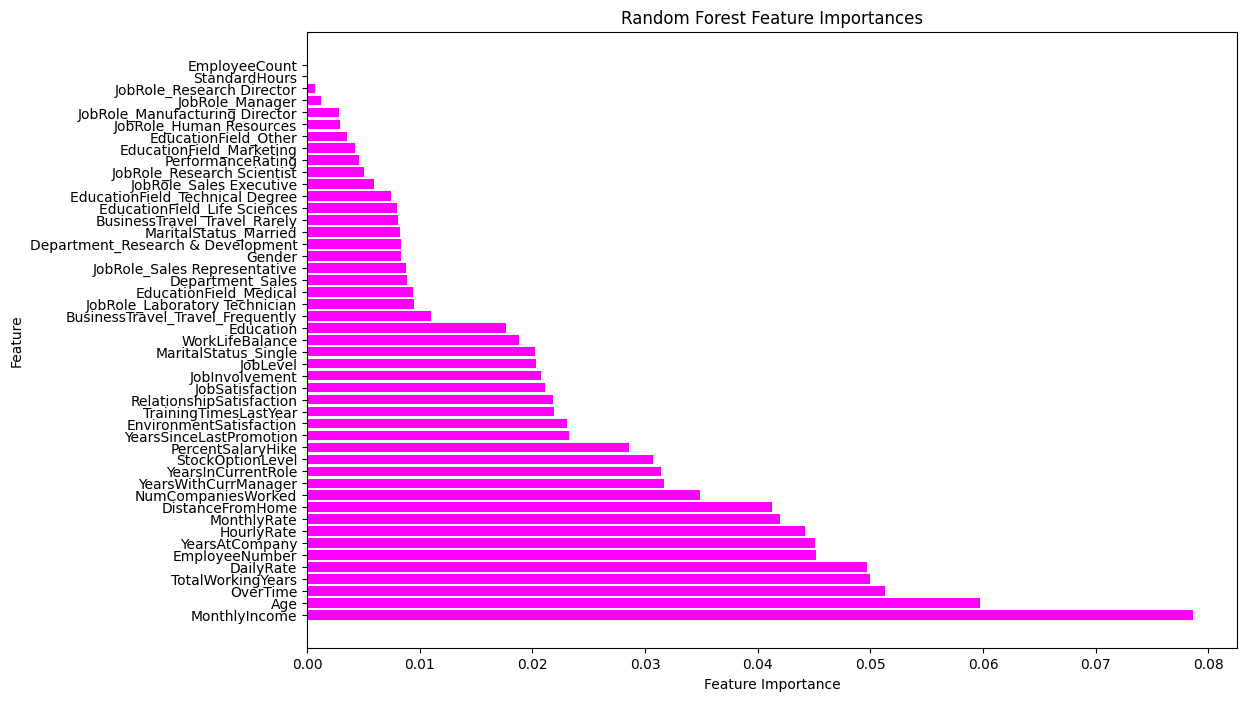

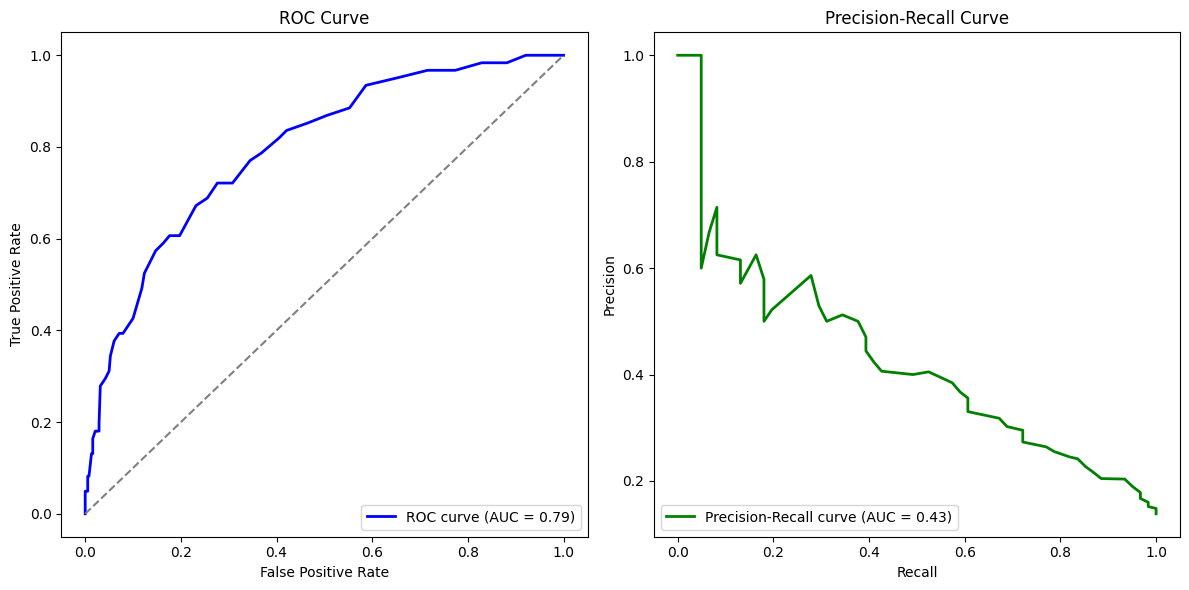

In [17]:
# RANDOM FOREST
# Import the required libraries for Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

# Step 1: Handle missing values (if any)
df.dropna(inplace=True)

# Step 2: Encode categorical variables that are not already encoded
label_encoder = LabelEncoder()

# Label encoding for binary variables if not already done
if df['Attrition'].dtype == 'object':
    df['Attrition'] = label_encoder.fit_transform(df['Attrition'])  # Yes -> 1, No -> 0

if df['OverTime'].dtype == 'object':
    df['OverTime'] = label_encoder.fit_transform(df['OverTime'])  # Yes -> 1, No -> 0

if df['Gender'].dtype == 'object':
    df['Gender'] = label_encoder.fit_transform(df['Gender'])  # Male -> 1, Female -> 0

# Step 3: Ensure all feature columns are numeric (if needed)
# This will apply one-hot encoding on non-numeric columns that are not yet encoded
df = pd.get_dummies(df, drop_first=True)

# Step 4: Define features and target variable
X = df.drop(columns=['Attrition'])  # Features
y = df['Attrition']  # Target variable

# Step 5: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Train the Random Forest model
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# Step 7: Predict and evaluate the model
y_pred = random_forest.predict(X_test)

# Step 8: Evaluate performance with classification report and confusion matrix
print("\n--- Random Forest Performance ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 9: Feature importance plot with sorted features
feature_importances = random_forest.feature_importances_
feature_names = X.columns

# Sort the feature importances in descending order
sorted_idx = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_idx]
sorted_feature_names = feature_names[sorted_idx]

# Plot the sorted feature importances
plt.figure(figsize=(12, 8))
plt.barh(sorted_feature_names, sorted_feature_importances, color='magenta')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importances')
plt.show()

# Step 10: Calculate ROC Curve and Precision-Recall Curve
# Import libraries for plotting ROC and Precision-Recall curves
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Get the probability of the positive class (class 1)
y_prob = random_forest.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)

# Plot ROC Curve
plt.figure(figsize=(12, 6))

# Plot ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Plot Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='green', lw=2, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()


--- Gradient Boosting ---
Accuracy: 0.8707482993197279

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       380
           1       0.57      0.26      0.36        61

    accuracy                           0.87       441
   macro avg       0.73      0.62      0.64       441
weighted avg       0.85      0.87      0.85       441


Confusion Matrix:
[[368  12]
 [ 45  16]]


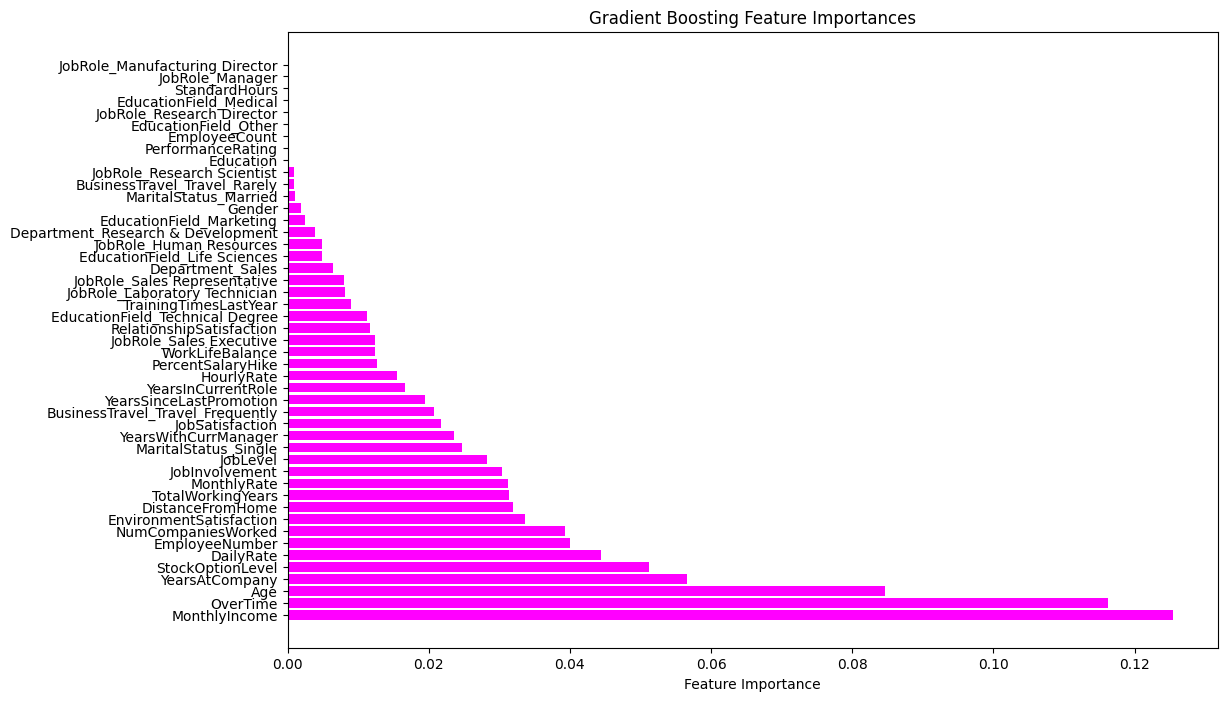

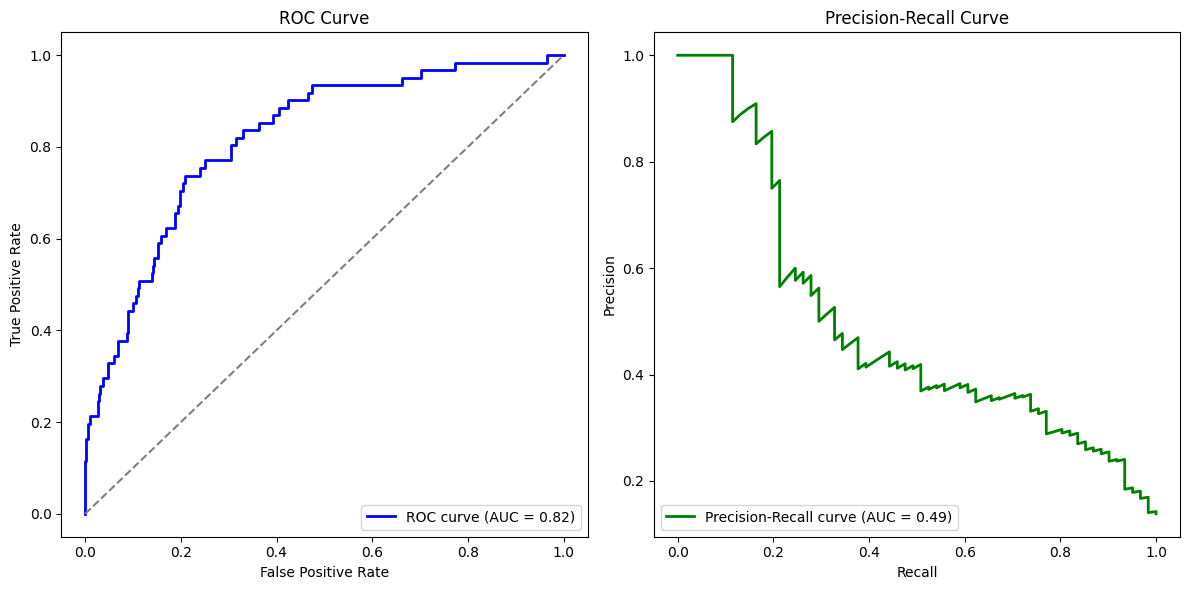

In [18]:
# GRADIENT BOOSTING
# Import necessary libraries for Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Train the Gradient Boosting model
print("\n--- Gradient Boosting ---")
# Initialize the GradientBoostingClassifier
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Train the model on the training data
gradient_boosting.fit(X_train, y_train)

# Step 2: Predict and evaluate the model
y_pred = gradient_boosting.predict(X_test)

# Step 3: Performance metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Step 4: Plot feature importances
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(12, 8))
feature_importances = gradient_boosting.feature_importances_
features = X_train.columns

# Sort features by importance
indices = np.argsort(feature_importances)[::-1]

plt.barh(range(len(features)), feature_importances[indices], align="center", color='magenta')
plt.yticks(range(len(features)), np.array(features)[indices])
plt.xlabel('Feature Importance')
plt.title('Gradient Boosting Feature Importances')
plt.show()

# Step 5: Calculate ROC Curve and Precision-Recall Curve
# Import necessary libraries for ROC and Precision-Recall curves
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Get the probability of the positive class (class 1)
y_prob = gradient_boosting.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)

# Plot ROC Curve and Precision-Recall Curve side by side
plt.figure(figsize=(12, 6))

# Plot ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Plot Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='green', lw=2, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()


--- Logistic Regression ---


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8888888888888888

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       380
           1       0.70      0.34      0.46        61

    accuracy                           0.89       441
   macro avg       0.80      0.66      0.70       441
weighted avg       0.87      0.89      0.87       441


Confusion Matrix:
[[371   9]
 [ 40  21]]


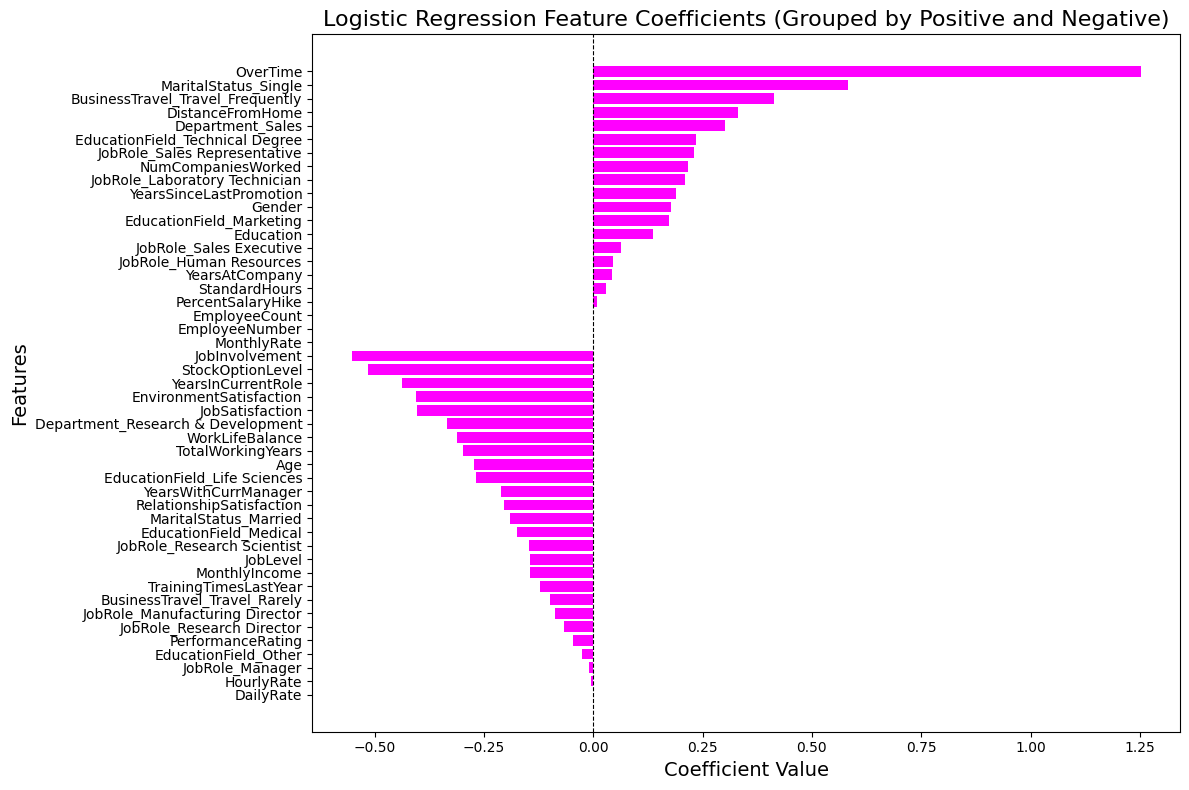

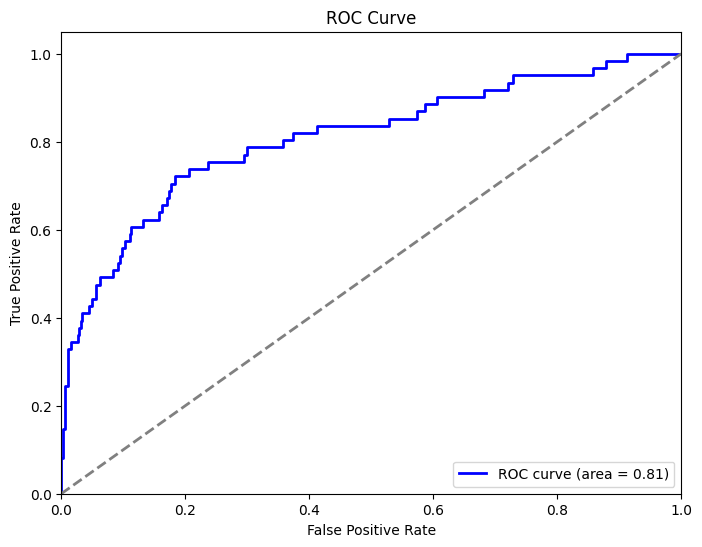

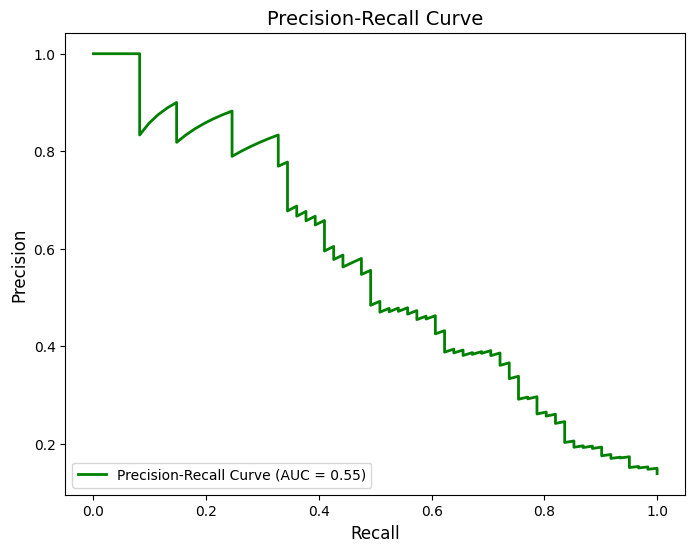

In [19]:
# LOGISTIC REGRESSION
# Import necessary libraries for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Train the Logistic Regression model
print("\n--- Logistic Regression ---")
# Initialize the LogisticRegression model
logistic_regression = LogisticRegression(random_state=42, max_iter=1000)

# Train the model on the training data
logistic_regression.fit(X_train, y_train)

# Step 2: Predict and evaluate the model
y_pred = logistic_regression.predict(X_test)

# Step 3: Performance metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Step 4: Plot feature coefficients for Logistic Regression
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Extract coefficients and feature names
coefficients = logistic_regression.coef_[0]  # Get coefficients from the logistic regression model
features = X_train.columns  # Get feature names from the training data

# Separate positive and negative coefficients
positive_indices = np.where(coefficients > 0)[0]  # Indices of positive coefficients
negative_indices = np.where(coefficients <= 0)[0]  # Indices of negative coefficients

# Sort positive coefficients (descending order)
sorted_positive_indices = positive_indices[np.argsort(coefficients[positive_indices])[::-1]]
sorted_positive_coefficients = coefficients[sorted_positive_indices]
sorted_positive_features = features[sorted_positive_indices]

# Sort negative coefficients (ascending order)
sorted_negative_indices = negative_indices[np.argsort(coefficients[negative_indices])]
sorted_negative_coefficients = coefficients[sorted_negative_indices]
sorted_negative_features = features[sorted_negative_indices]

# Combine sorted positive and negative coefficients for the plot
sorted_features = np.concatenate([sorted_positive_features, sorted_negative_features])
sorted_coefficients = np.concatenate([sorted_positive_coefficients, sorted_negative_coefficients])

# Plot the sorted coefficients
plt.figure(figsize=(12, 8))
plt.barh(
    sorted_features,
    sorted_coefficients,
    color=['magenta']
)
plt.xlabel('Coefficient Value', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Logistic Regression Feature Coefficients (Grouped by Positive and Negative)', fontsize=16)
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')  # Add a vertical line at 0
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()  # Adjust layout for clarity
plt.show()

# Step 5: Calculate ROC Curve and Precision-Recall Curve
# Import necessary libraries for ROC and Precision-Recall curves
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

# Get predicted probabilities
y_prob = logistic_regression.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2, label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})')  # Add AUC to label
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curve', fontsize=14)
plt.legend(loc='lower left', fontsize=10)
plt.show()